# Modeling for predicting ratings

<div class="span5 alert alert-info">
<b>
Create training and test sets
</b>
</div>  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dfm = pd.read_csv("ZomatoDataExtractingAndCleaning/zomato_clean_data_csv/zomato_reduced_data.csv")

In [6]:
dfm['featured_in_count'] = dfm['featured_in_count'].fillna(0)

In [7]:
dfm = dfm[dfm['rating'].notnull()]
dfm = dfm[dfm['votes'].notnull()]

In [8]:

X = dfm[['locality','restaurant_category','photos_taken','votes','approx_cost_for_2','featured_in_count','zomato_gold','discounts',
        'Fast Food','Cocktails','Mocktails','Pizza','Pasta',
        'Friendly Staff', 'Courteous Staff','Decor']]

y = dfm['rating']

<div class="span5 alert alert-info">
<b>
Linear Regression
</b>
</div>

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# # Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# # Predict on the test data: y_pred
y_pred_test = reg_all.predict(X_test)

from sklearn.metrics import r2_score
print('Test accuracy',r2_score(y_test,y_pred_test))

y_pred_train = reg_all.predict(X_train)

from sklearn.metrics import r2_score
print('Train accuracy',r2_score(y_train,y_pred_train))


Test accuracy 0.34918350463200365
Train accuracy 0.34873086405591336


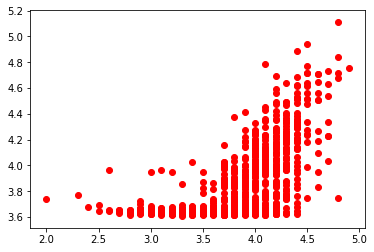

In [10]:
plt.scatter(y_test, y_pred_test, color = 'red')

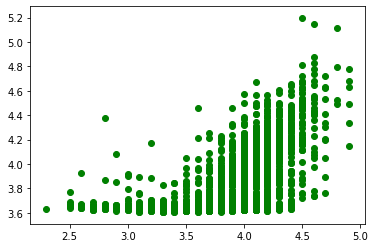

In [11]:
plt.scatter(y_train, y_pred_train, color = 'green')

<div class="span5 alert alert-info">
<b>
RandomForestRegressor
</b>
</div>

In [12]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

RForest = RandomForestRegressor(n_estimators=100,random_state=329,min_samples_leaf=.0001)

RForest.fit(X_train,y_train)

y_pred_test = RForest.predict(X_test)

from sklearn.metrics import r2_score
print('Test accuracy',r2_score(y_test,y_pred_test))

y_pred_train = RForest.predict(X_train)

from sklearn.metrics import r2_score
print('Train accuracy',r2_score(y_train,y_pred_train))

Test accuracy 0.5371496023075175
Train accuracy 0.9347756579897907


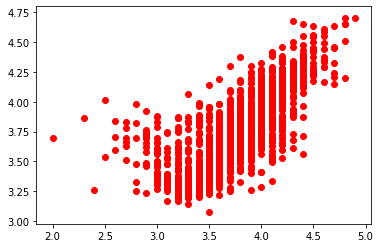

In [13]:
plt.scatter(y_test, y_pred_test, color = 'red')

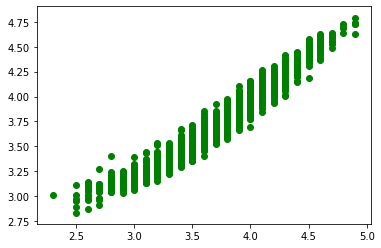

In [14]:
plt.scatter(y_train, y_pred_train, color = 'green')

<div class="span5 alert alert-info">
<b>
RandomSearchCV
</b>
</div>

In [15]:
print(RForest.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.0001, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 329, 'verbose': 0, 'warm_start': False}


In [16]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.7s
/Users/Anand/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [18]:
print(rf_random.best_params_)

{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [19]:
best_random = rf_random.best_estimator_

In [20]:
best_random.fit(X_train,y_train)

y_pred_test = best_random.predict(X_test)

from sklearn.metrics import r2_score
print('Test accuracy',r2_score(y_test,y_pred_test))

y_pred_train = best_random.predict(X_train)

from sklearn.metrics import r2_score
print('Train accuracy',r2_score(y_train,y_pred_train))

Test accuracy 0.5676988468101289
Train accuracy 0.6827099604471041


<div class="span5 alert alert-info">
<b>
GridSearchCV
    
Narrowing the parameters range obtained from random search
</b>
</div>

In [21]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [22]:
from sklearn.model_selection import GridSearchCV

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [23]:
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.1min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [24]:
best_grid = grid_search.best_estimator_

In [25]:
best_grid.fit(X_train,y_train)

y_pred_test = best_grid.predict(X_test)

from sklearn.metrics import r2_score
print('Test accuracy',r2_score(y_test,y_pred_test))

y_pred_train = best_random.predict(X_train)

from sklearn.metrics import r2_score
print('Train accuracy',r2_score(y_train,y_pred_train))

Test accuracy 0.5634935298252538
Train accuracy 0.6827099604471041
